In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,shutil
import cv2
import matplotlib.image as mping
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import os

folder = "/content/drive/MyDrive/Brain Tumor Classification/data/brain_tumor_dataset/yes"
count = 1

for i in os.listdir(folder):
    source = os.path.join(folder, i)
    destination = os.path.join(folder, f"Y_{count}.jpg")

    if os.path.exists(source):  # Check if the file exists
        os.rename(source, destination)
        count += 1
    else:
        print(f"File not found: {source}")

print("All files are renamed in the yes dir")


All files are renamed in the yes dir


In [3]:
import os

folder = "/content/drive/MyDrive/Brain Tumor Classification/data/brain_tumor_dataset/no"
count = 1

for i in os.listdir(folder):
    source = os.path.join(folder, i)
    destination = os.path.join(folder, f"N_{count}.jpg")

    if os.path.exists(source):  # Check if the file exists
        os.rename(source, destination)
        count += 1
    else:
        print(f"File not found: {source}")

print("All files are renamed in the no dir")


All files are renamed in the no dir


# EDA(Exploratory Data Analysis)

In [4]:
listyes=os.listdir("/content/drive/MyDrive/Brain Tumor Classification/data/brain_tumor_dataset/yes")
number_files_yes=len(listyes)
print(number_files_yes)

listno=os.listdir("/content/drive/MyDrive/Brain Tumor Classification/data/brain_tumor_dataset/no")
number_files_no=len(listno)
print(number_files_no)

155
98


In [5]:
import pandas as pd
count_df = pd.DataFrame({'Category': ['Yes', 'No'], 'File_Count': [number_files_yes, number_files_no]})

print(count_df)

  Category  File_Count
0      Yes         155
1       No          98


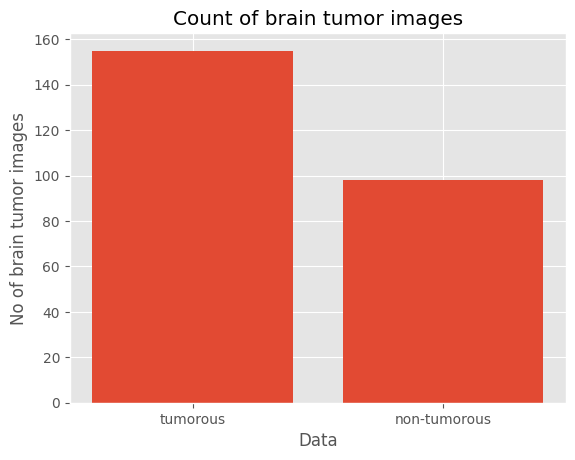

In [6]:
data={'tumorous' : number_files_yes,'non-tumorous': number_files_no}

types=data.keys()
values=data.values()

plt.bar(types,values)

plt.xlabel("Data")
plt.ylabel("No of brain tumor images")
plt.title("Count of brain tumor images")
plt.show()

# Data Augumentation
155(61%),98(39%)

imbalance

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [8]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os

def augmented_data(file_dir, n_generated_sample, save_to_dir):
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        brightness_range=(0.3, 1.0),
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    # Ensure save_to_dir exists
    os.makedirs(save_to_dir, exist_ok=True)

    for filename in os.listdir(file_dir):
        image_path = os.path.join(file_dir, filename)

        # Read image
        image = cv2.imread(image_path)

        # Check if image is valid
        if image is None:
            print(f"Warning: Could not read image {filename}. Skipping...")
            continue

        # Convert BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Expand dimensions to (1, H, W, C)
        image = np.expand_dims(image, axis=0)

        # Generate augmented images
        save_prefix = 'aug_' + filename[:-4]
        i = 0
        for batch in datagen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, save_prefix=save_prefix, save_format="jpg"):
            i += 1
            if i >= n_generated_sample:  # Generate exact number of images
                break


In [10]:
import time

start_time = time.time()

yes_path = '/content/drive/MyDrive/Brain Tumor Classification/data/brain_tumor_dataset/yes'
no_path = '/content/drive/MyDrive/Brain Tumor Classification/data/brain_tumor_dataset/no'
augmented_data_path = '/content/drive/MyDrive/Brain Tumor Classification/augmented_data'

# Ensure correct path concatenation
augmented_data(file_dir=yes_path, n_generated_sample=6, save_to_dir=augmented_data_path + '/yes')
augmented_data(file_dir=no_path, n_generated_sample=9, save_to_dir=augmented_data_path + '/no')

end_time = time.time()  # Fix function call
execution_time = end_time - start_time

# Print execution time correctly
print(f"Execution Time: {execution_time:.2f} seconds")


Execution Time: 101.16 seconds


In [11]:
def data_summary(main_path):
  yes_path="/content/drive/MyDrive/Brain Tumor Classification/augmented_data/yes"
  no_path="/content/drive/MyDrive/Brain Tumor Classification/augmented_data/no"

  len



  n_pos=len(os.listdir(yes_path))
  n_neg=len(os.listdir(no_path))

  n=n_pos + n_neg

  pos_per=(n_pos *100)/n
  neg_per=(n_neg *100)/n

  print(f"Number of sample {n}")
  print(f"{n_pos} number of positive {pos_per} %")
  print(f"{n_neg} number of negative {neg_per} %")

In [12]:
augmented_data_path = '/content/drive/MyDrive/Brain Tumor Classification/augmented_data'
data_summary(augmented_data_path)

Number of sample 1812
930 number of positive 51.324503311258276 %
882 number of negative 48.675496688741724 %


In [13]:
listyes=os.listdir("/content/drive/MyDrive/Brain Tumor Classification/augmented_data/yes")
number_files_yes=len(listyes)
print(number_files_yes)

listno=os.listdir("/content/drive/MyDrive/Brain Tumor Classification/augmented_data/no")
number_files_no=len(listno)
print(number_files_no)

930
882


In [14]:
import pandas as pd
count_df1= pd.DataFrame({'Category': ['Yes', 'No'], 'File_Count': [number_files_yes, number_files_no]})

print(count_df1)

  Category  File_Count
0      Yes         930
1       No         882


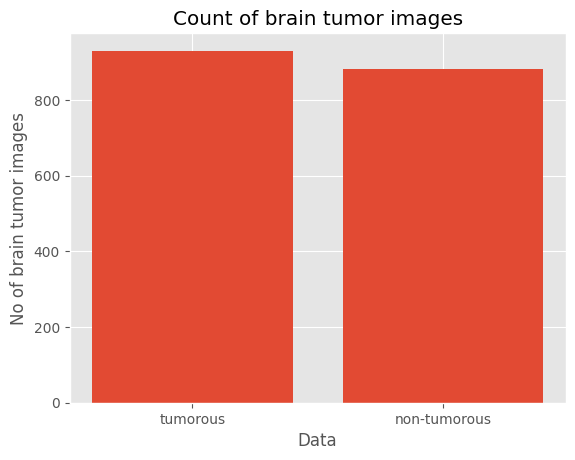

In [15]:
data={'tumorous' : number_files_yes,'non-tumorous': number_files_no}

types=data.keys()
values=data.values()

plt.bar(types,values)

plt.xlabel("Data")
plt.ylabel("No of brain tumor images")
plt.title("Count of brain tumor images")
plt.show()

# Data preprocessing

Convert BGR to gray

GaussianBlur

Threshold

Erode

Dilate

Find Contours

In [16]:
import imutils
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)

    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)

    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)

        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

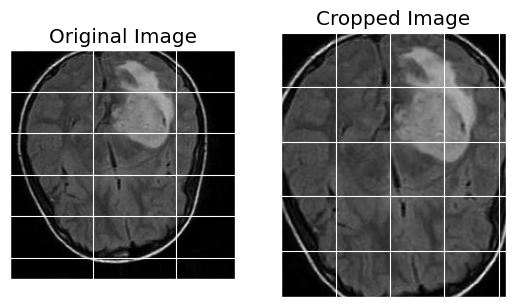

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [3, 3, 3],
        [3, 3, 3]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [5, 5, 5],
        [4, 4, 4]]], dtype=uint8)
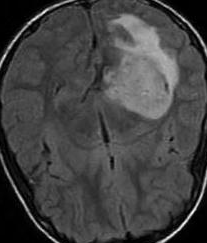

In [18]:
img = cv2.imread('/content/drive/MyDrive/Brain Tumor Classification/augmented_data/yes/aug_Y_100_0_1407.jpg')
crop_brain_tumor(img, True)

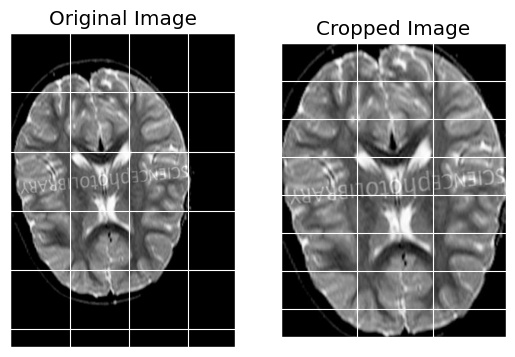

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
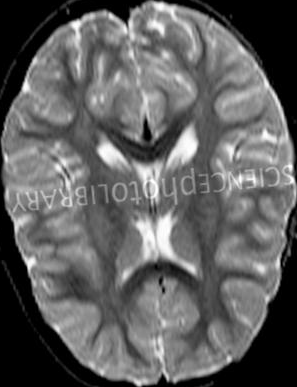

In [19]:
img = cv2.imread('/content/drive/MyDrive/Brain Tumor Classification/augmented_data/no/aug_N_10_0_3100.jpg')
crop_brain_tumor(img, True)

# Image Loading

In [20]:
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X=[]
    y=[]

    image_width, image_height=image_size

    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)

    X,y = shuffle(X,y)
    print(f"Number of example is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    return X,y


In [21]:
import os

path = "/content/drive/MyDrive/Brain Tumor Classification/augmented_datayes"
print("Exists:", os.path.exists(path))
print("Is Directory:", os.path.isdir(path))


Exists: False
Is Directory: False


In [22]:
augmented_path = '/content/drive/MyDrive/Brain Tumor Classification/augmented_data/'
augmeneted_yes = augmented_path + 'yes'
augmeneted_no = augmented_path + 'no'

IMAGE_WIDTH, IMAGE_HEIGHT = (240,240)

X,y = load_data([augmeneted_yes, augmeneted_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Number of example is : 1812
X SHAPE is : (1812, 240, 240, 3)
y SHAPE is : (1812,)


In [23]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]

        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))

        i = 1
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])

            plt.tick_params(axis='both', which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)

            i += 1

        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

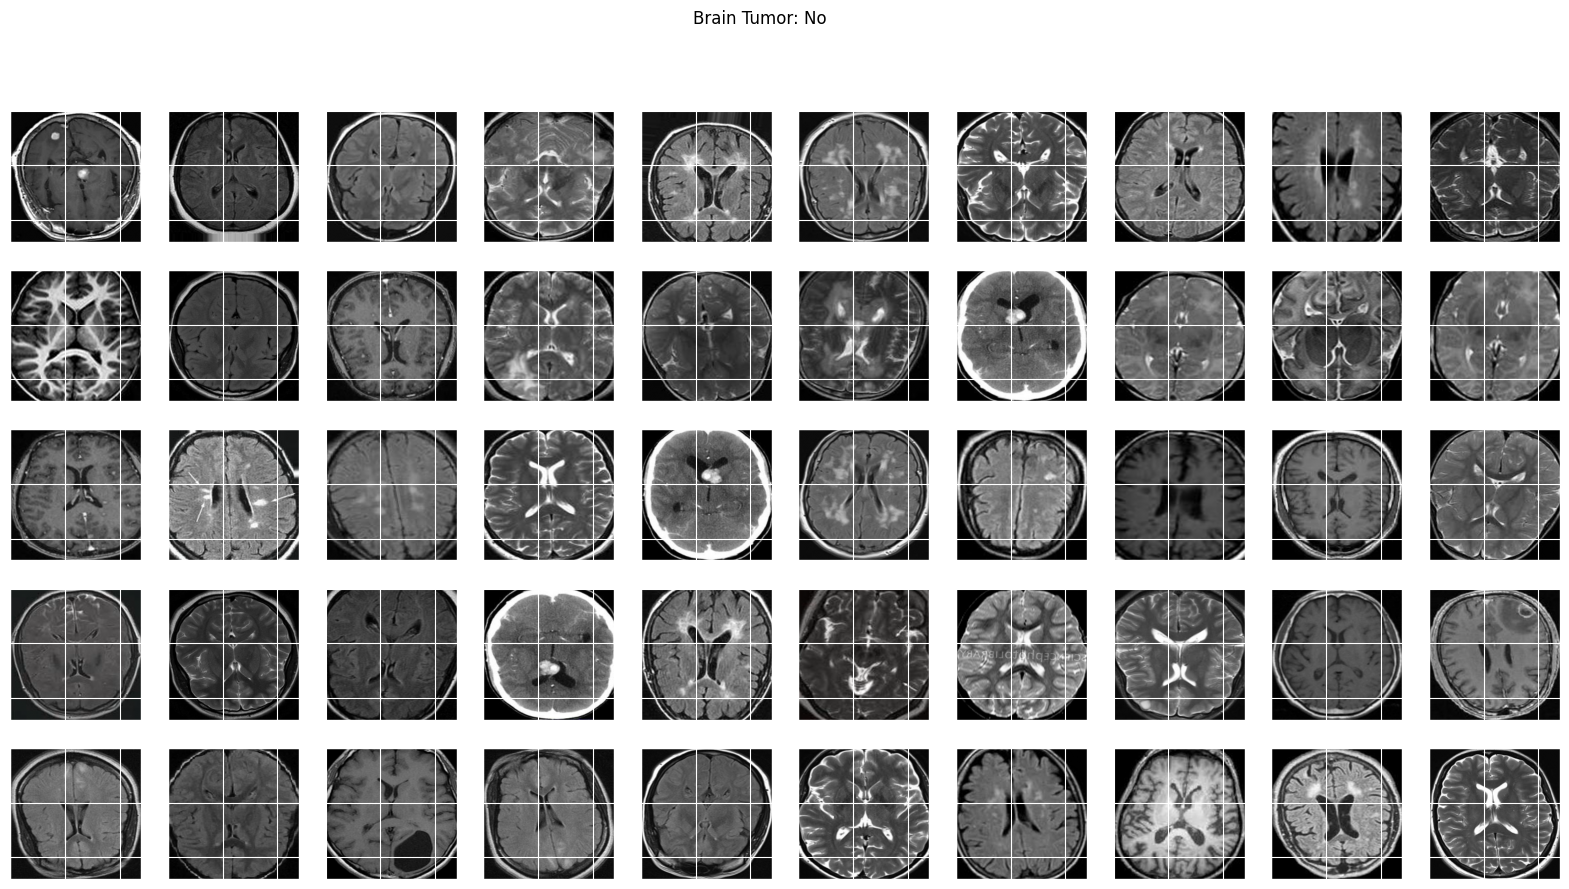

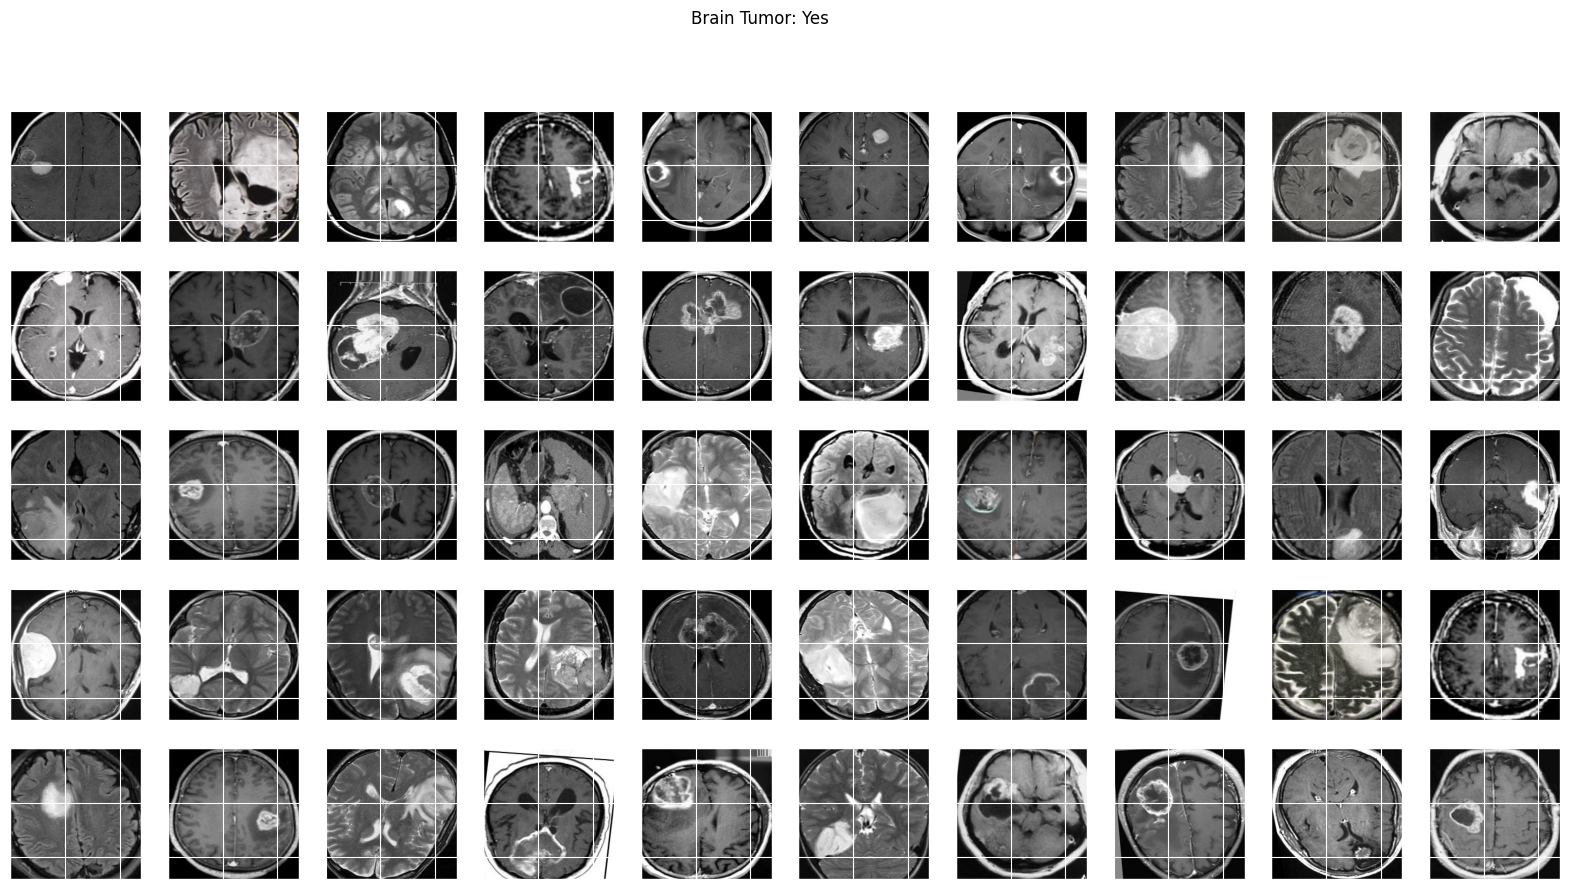

In [24]:
plot_sample_images(X,y)

# Data Spliting
### Train
### Test
### Validation

In [25]:
import os

base_dir = "/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous"
os.makedirs(base_dir, exist_ok=True)

print(f" Directory '{base_dir}' is ready!")


 Directory '/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous' is ready!


In [26]:
if not os.path.isdir('/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/train'):
    train_dir = os.path.join(base_dir , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/test'):
    test_dir = os.path.join(base_dir , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/valid'):
    valid_dir = os.path.join(base_dir , 'valid')
    os.mkdir(valid_dir)

In [27]:
if not os.path.isdir('/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir, 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir, 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join(valid_dir, 'tumorous')
    os.mkdir(infected_valid_dir)

In [28]:
if not os.path.isdir('/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join(train_dir, 'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join(test_dir, 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/nonvalid/tumorous'):
    healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
    os.mkdir(healthy_valid_dir)

In [29]:
original_dataset_tumorours = os.path.join('/content/drive/MyDrive/Brain Tumor Classification/augmented_data','yes')
original_dataset_nontumorours = os.path.join('/content/drive/MyDrive/Brain Tumor Classification/augmented_data','no')

In [30]:
files = os.listdir('/content/drive/MyDrive/Brain Tumor Classification/augmented_data/yes')
fnames = []
for i in range(0,651):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
files = os.listdir('/content/drive/MyDrive/Brain Tumor Classification/augmented_data/yes')
fnames = []
for i in range(651,791):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_test_dir, fname)
    shutil.copyfile(src, dst)



In [32]:
files = os.listdir('/content/drive/MyDrive/Brain Tumor Classification/augmented_data/yes')
fnames = []
for i in range(791,929):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_valid_dir, fname)
    shutil.copyfile(src, dst)


80%  10%  10%

In [33]:
files = os.listdir('/content/drive/MyDrive/Brain Tumor Classification/augmented_data/no')
fnames = []
for i in range(0,704):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)

In [34]:
files = os.listdir('/content/drive/MyDrive/Brain Tumor Classification/augmented_data/no')
fnames = []
for i in range(704,792):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_test_dir, fname)
    shutil.copyfile(src, dst)



In [35]:
files = os.listdir('/content/drive/MyDrive/Brain Tumor Classification/augmented_data/no')
fnames = []
for i in range(792,881):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_valid_dir, fname)
    shutil.copyfile(src, dst)

# Model Building

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_data_gen = ImageDataGenerator(rescale=1.0/255)
valid_data_gen = ImageDataGenerator(rescale=1.0/255)

Found 1355 images belonging to 2 classes.


In [37]:
train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/train',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    color_mode='rgb'
)

print("Train generator successfully created!")

Found 1355 images belonging to 2 classes.
Train generator successfully created!


In [38]:

test_generator = test_data_gen.flow_from_directory(
    directory='/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/test',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    color_mode='rgb'
)

print("Test generator successfully created!")

Found 228 images belonging to 2 classes.
Test generator successfully created!


In [39]:
valid_generator =valid_data_gen.flow_from_directory(
    directory='/content/drive/MyDrive/Brain Tumor Classification/tumorous_and_nontumorous/valid',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    color_mode='rgb'
)

print("Valid generator successfully created!")

Found 227 images belonging to 2 classes.
Valid generator successfully created!


In [40]:
class_labels = train_generator.class_indices
class_name = {value: key for (key,value) in class_labels.items()}

In [41]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [42]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load VGG16 as base model
base_model = VGG16(input_shape=(240, 240, 3), include_top=False, weights='imagenet')

# Freeze all layers in VGG16
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)  # 2 classes for classification

# Create the final model
model_01 = Model(inputs=base_model.input, outputs=output)

# Display model summary
model_01.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4608)                │     115,610,112 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 135,636,674 (517.41 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [43]:
# Callbacks
filepath = 'model_.h5'

es = EarlyStopping(monitor='val_loss', patience=6, mode='min', verbose=1)
cp = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, verbose=1)
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

In [44]:
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [45]:
from tensorflow.keras.optimizers import Adam

model_01.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # ✅ Faster convergence
    metrics=['accuracy']
)


In [46]:
es = EarlyStopping(monitor='val_loss', patience=8, mode='min', verbose=1)
lrr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=0.0001, verbose=1)

In [47]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [51]:
history_01 = model_01.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=8,
    callbacks=[es, cp, lrr],
    validation_data=valid_generator
)


Epoch 1/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.8331 - loss: 0.3656
Epoch 1: val_loss improved from 0.31085 to 0.25070, saving model to model_.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.8333 - loss: 0.3654 - val_accuracy: 0.8987 - val_loss: 0.2507 - learning_rate: 0.0010
Epoch 2/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.8644 - loss: 0.2964
Epoch 2: val_loss did not improve from 0.25070
43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 624ms/step - accuracy: 0.8643 - loss: 0.2968 - val_accuracy: 0.8987 - val_loss: 0.2568 - learning_rate: 0.0010
Epoch 3/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.8554 - loss: 0.3177
Epoch 3: val_loss did not improve from 0.25070
43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 620ms/step - accuracy: 0.8552 - loss: 0.3183 - val_accuracy: 0.8458 - val_loss: 0.3840 - learning_rate: 0.0010
Epoch 4/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.8812 - loss: 0.2707
Epoch 4: val_loss did not improve from 0.25070
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 625ms/step - accuracy: 0.8811 - loss: 0.2710 - val_accuracy: 0.8590 - val_loss: 0.2641 - learning_rate: 0.0010
Epoch 5/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 0

43/43 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.8449 - loss: 0.3354 - val_accuracy: 0.8899 - val_loss: 0.2357 - learning_rate: 0.0010
Epoch 6/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.8785 - loss: 0.2687
Epoch 6: val_loss did not improve from 0.23569
43/43 ━━━━━━━━━━━━━━━━━━━━ 29s 657ms/step - accuracy: 0.8785 - loss: 0.2689 - val_accuracy: 0.8899 - val_loss: 0.2665 - learning_rate: 0.0010
Epoch 7/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.8653 - loss: 0.3122
Epoch 7: val_loss did not improve from 0.23569
43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 625ms/step - accuracy: 0.8654 - loss: 0.3118 - val_accuracy: 0.8767 - val_loss: 0.2697 - learning_rate: 0.0010
Epoch 8/8
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.9160 - loss: 0.2068
Epoch 8: val_loss did not improve from 0.23569
43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 661ms/step - accuracy: 0.9158 - loss: 0.2072 - val_accuracy: 0.8855 - val_loss: 0.2363 - learning_rate: 0.0010


In [52]:
scores=model_01.evaluate(test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 778ms/step - accuracy: 0.8426 - loss: 0.4130


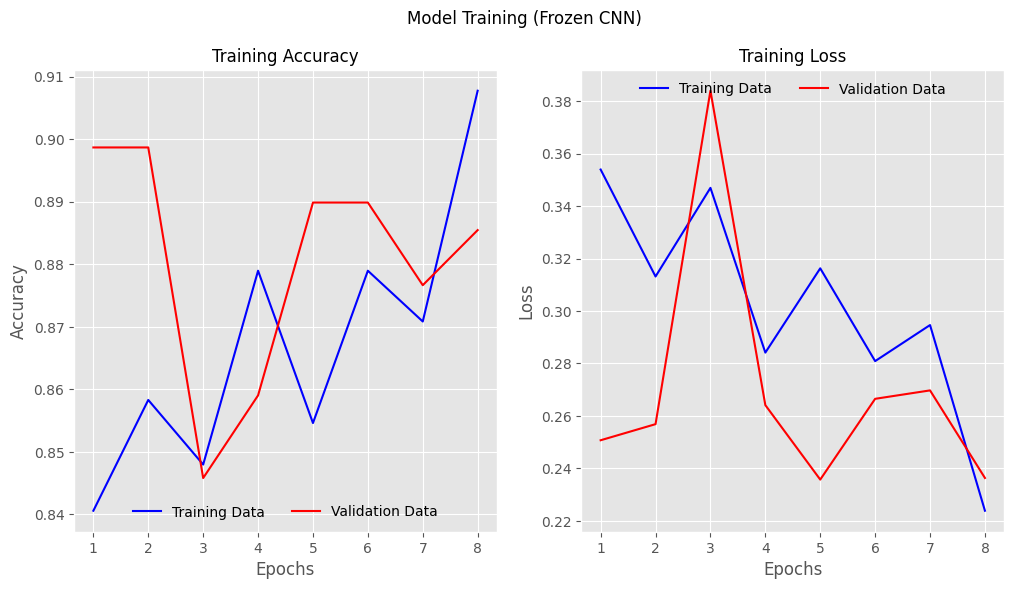

In [53]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [54]:
scores

[0.4548000395298004, 0.8289473652839661]

In [55]:
model_01.save('model.h5')

In [56]:
model=tf.keras.models.load_model('model.h5')

In [57]:
vgg_val_eval_01 = model.evaluate(valid_generator)
vgg_test_eval_01 = model.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.8710 - loss: 0.2429
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.8367 - loss: 0.4776


In [58]:
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Acc: {vgg_val_eval_01[1]}')
print(f'Testing Loss: {vgg_test_eval_01[0]}')
print(f'Testing Acc: {vgg_test_eval_01[1]}')

Validation Loss: 0.2363097071647644
Validation Acc: 0.8854625821113586
Testing Loss: 0.4548000991344452
Testing Acc: 0.8289473652839661


# 1st Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


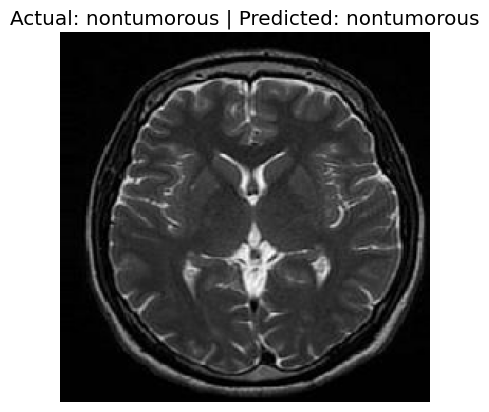

In [106]:
import matplotlib.pyplot as plt
import numpy as np

img, label = next(test_generator)

first_img = img[0]  # Remove .astype('uint8') if values are in [0, 1]
first_label = np.argmax(label[0])

pred_img = model.predict(img)

plt.imshow(first_img)  # If needed: plt.imshow((first_img * 255).astype('uint8'))
plt.title(f"Actual: {class_name[first_label]} | Predicted: {class_name[np.argmax(pred_img[0])]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


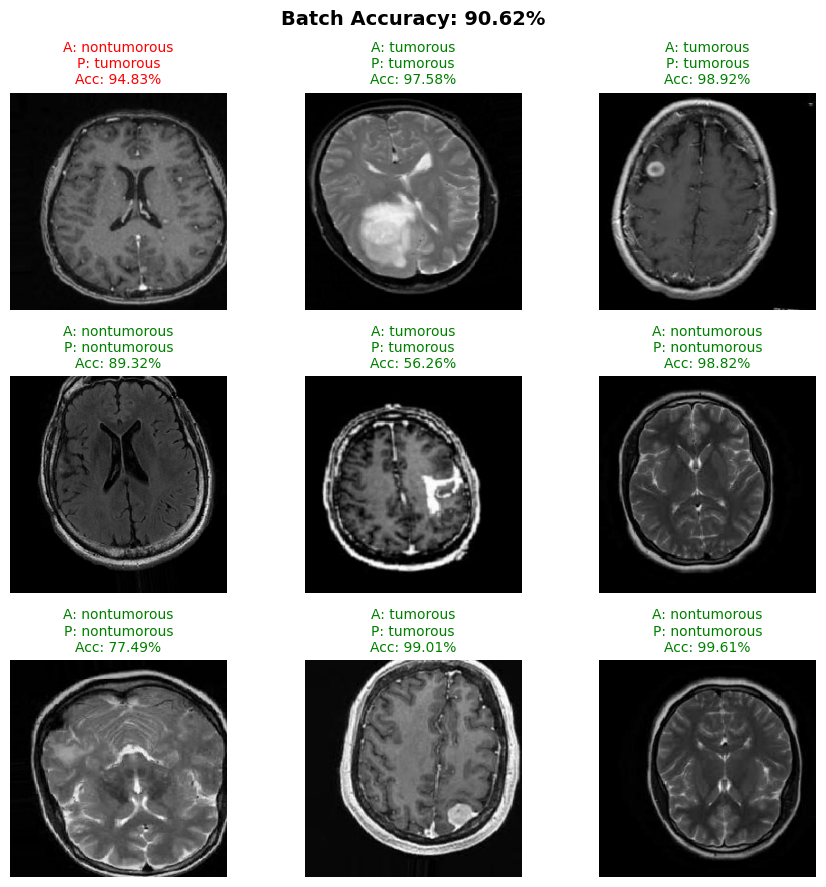

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
img, label = next(test_generator)

# Model predictions
pred_img = model.predict(img)
pred_labels = np.argmax(pred_img, axis=1)
true_labels = np.argmax(label, axis=1)
confidences = np.max(pred_img, axis=1)  # Extract highest confidence score per prediction

# Calculate batch accuracy
batch_accuracy = np.mean(pred_labels == true_labels) * 100

# Display 3x3 grid of images
plt.figure(figsize=(9, 9))  # Adjust figure size for clarity

for i in range(9):
    plt.subplot(3, 3, i + 1)

    # Display image (ensure correct scaling)
    first_img = img[i]
    if first_img.max() <= 1:
        first_img = (first_img * 255).astype('uint8')

    plt.imshow(first_img)
    plt.axis('off')

    # Labels and accuracy display
    actual = class_name[true_labels[i]]
    predicted = class_name[pred_labels[i]]
    accuracy_score = confidences[i] * 100  # Confidence as percentage
    color = 'green' if actual == predicted else 'red'  # Highlight incorrect predictions

    plt.title(
        f"A: {actual}\nP: {predicted}\nAcc: {accuracy_score:.2f}%",
        fontsize=10,
        color=color
    )

# Add batch accuracy on top of the grid
plt.suptitle(f"Batch Accuracy: {batch_accuracy:.2f}%", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# Increamental unfreezing and fine tuning

In [69]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=False, input_shape=(240,240,3))

base_model_layer_names = [layer.name for layer in base_model.layers]

print(base_model_layer_names)


['input_layer_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


In [72]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load VGG16 instead of VGG19
base_model = VGG16(include_top=False, input_shape=(240,240,3))

# Get layer names
base_model_layer_names = [layer.name for layer in base_model.layers]
print(base_model_layer_names)  # To verify the layers

# Build custom model on top of VGG16
x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

model_02 = Model(base_model.inputs, output)

# Load pre-trained weights (Make sure this file exists)
model_02.load_weights('model.h5')

# Set trainable layers in VGG16
set_trainable = False
for layer in base_model.layers:
    if layer.name in ['block5_conv3', 'block5_conv2']:  # Adjusted for VGG16
        set_trainable = True
    layer.trainable = set_trainable

# Print model summary
print(model_02.summary())


['input_layer_4', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4608)                │     115,610,112 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 135,636,674 (517.41 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 9,995,072 (38.13 MB)

None


In [73]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_02.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [74]:
history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs = 5, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_137']
Received: inputs=Tensor(shape=(None, 240, 240, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.9105 - loss: 0.2146
Epoch 1: val_loss did not improve from 0.23569
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1000ms/step - accuracy: 0.9118 - loss: 0.2117 - val_accuracy: 0.8987 - val_loss: 0.2507 - learning_rate: 1.0000e-04
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.8850 - loss: 0.2255
Epoch 2: val_loss did not improve from 0.23569
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 690ms/step - accuracy: 0.8858 - loss: 0.2245 - val_accuracy: 0.8722 - val_loss: 0.3018 - learning_rate: 1.0000e-04
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.8994 - loss: 0.2238
Epoch 3: val_loss did not improve from 0.23569
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 866ms/step - accuracy: 0.8998 - loss: 0.2224 - val_accuracy: 0.8767 - val_loss: 0.3016 - learning_rate: 1.0000e-04
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.9575 - loss: 0.1470
Epoch 4: val_loss improved from 0.23569 to 0.23308, saving model to model_.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9553 - loss: 0.1505 - val_accuracy: 0.8855 - val_loss: 0.2331 - learning_rate: 1.0000e-04
Epoch 5/5
 3/10 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.8924 - loss: 0.2752

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 5: val_loss improved from 0.23308 to 0.23237, saving model to model_.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8729 - loss: 0.3048 - val_accuracy: 0.8855 - val_loss: 0.2324 - learning_rate: 1.0000e-04


In [75]:
scores=model_02.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.8263 - loss: 0.4727


In [80]:
scores

[0.43870896100997925, 0.8421052694320679]

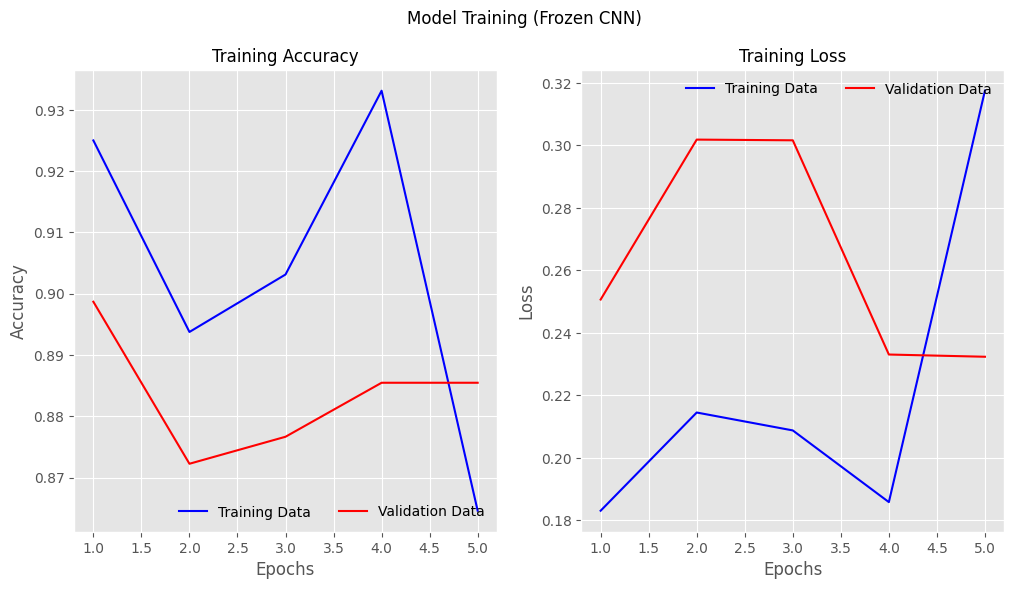

In [77]:
import matplotlib.pyplot as plt

# Ensure you use the same history variable
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)

# Get the number of epochs
max_epoch = len(history_02.history['accuracy']) + 1  # Make sure history_02 exists
epochs_list = list(range(1, max_epoch))

# Plot Accuracy
ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower right', ncol=2)  # Changed location to improve readability

# Plot Loss
ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper right', ncol=2)  # Adjusted position

# Save the plot
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')
plt.show()  # Display the plot


In [78]:
model_01.save('model1.h5')

In [79]:
model1=tf.keras.models.load_model('model1.h5')

In [81]:
vgg_val_eval_01 = model1.evaluate(valid_generator)
vgg_test_eval_01 = model1.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - accuracy: 0.8810 - loss: 0.2219
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.8328 - loss: 0.3772


# 2nd model testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


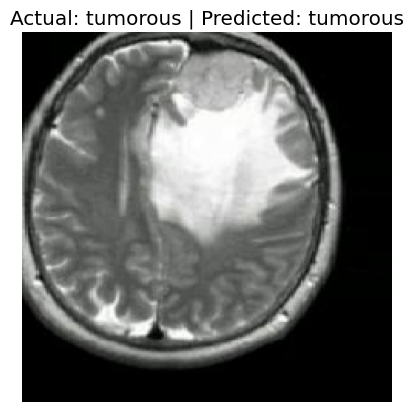

In [98]:
import matplotlib.pyplot as plt
import numpy as np

img, label = next(test_generator)

first_img = img[0]  # Remove .astype('uint8') if values are in [0, 1]
first_label = np.argmax(label[0])

pred_img = model1.predict(img)

plt.imshow(first_img)  # If needed: plt.imshow((first_img * 255).astype('uint8'))
plt.title(f"Actual: {class_name[first_label]} | Predicted: {class_name[np.argmax(pred_img[0])]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


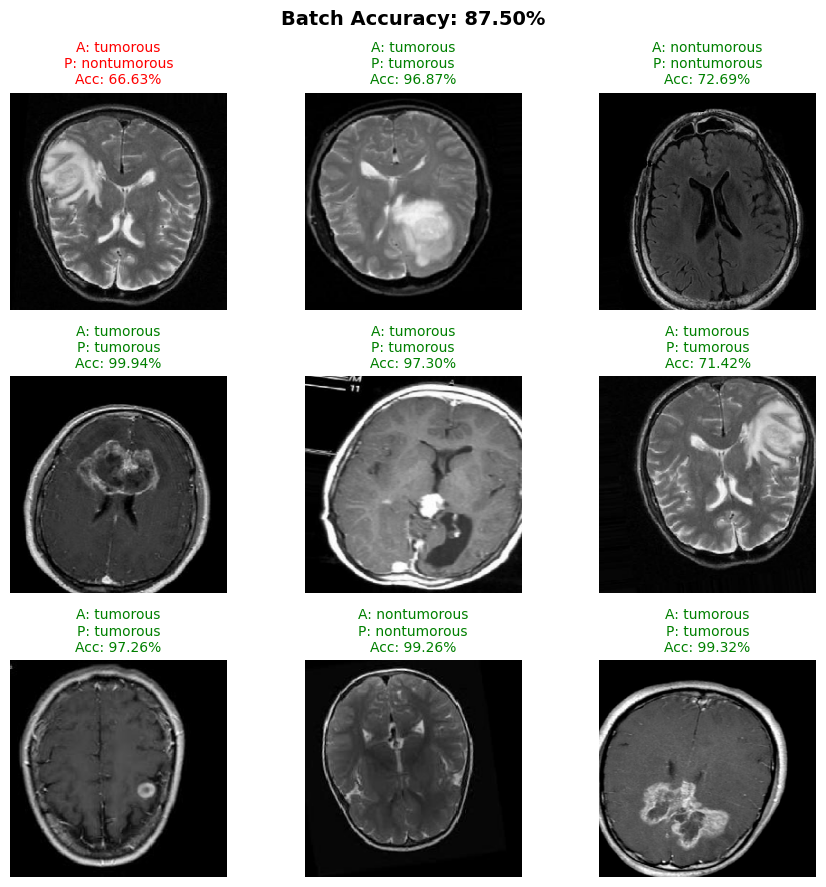

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
img, label = next(test_generator)

# Model predictions
pred_img = model1.predict(img)
pred_labels = np.argmax(pred_img, axis=1)
true_labels = np.argmax(label, axis=1)
confidences = np.max(pred_img, axis=1)  # Extract highest confidence score per prediction

# Calculate batch accuracy
batch_accuracy = np.mean(pred_labels == true_labels) * 100

# Display 3x3 grid of images
plt.figure(figsize=(9, 9))  # Adjust figure size for clarity

for i in range(9):
    plt.subplot(3, 3, i + 1)

    # Display image (ensure correct scaling)
    first_img = img[i]
    if first_img.max() <= 1:
        first_img = (first_img * 255).astype('uint8')

    plt.imshow(first_img)
    plt.axis('off')

    # Labels and accuracy display
    actual = class_name[true_labels[i]]
    predicted = class_name[pred_labels[i]]
    accuracy_score = confidences[i] * 100  # Confidence as percentage
    color = 'green' if actual == predicted else 'red'  # Highlight incorrect predictions

    plt.title(
        f"A: {actual}\nP: {predicted}\nAcc: {accuracy_score:.2f}%",
        fontsize=10,
        color=color
    )

# Add batch accuracy on top of the grid
plt.suptitle(f"Batch Accuracy: {batch_accuracy:.2f}%", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



# Unfreezing the entire network

In [86]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

# Load VGG16 instead of VGG19
base_model = VGG16(include_top=False, input_shape=(240,240,3))

# Get layer names (optional, for verification)
base_model_layer_names = [layer.name for layer in base_model.layers]
print(base_model_layer_names)

# Build custom model on top of VGG16
x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

model_03 = Model(base_model.inputs, output)

# Load weights (ensure this file exists)
model_03.load_weights('model1.h5')

# Compile model with SGD optimizer
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_03.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Print model summary (optional)
print(model_03.summary())


['input_layer_6', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4608)                │     115,610,112 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 135,636,674 (517.41 MB)

 Trainable params: 135,636,674 (517.41 MB)

 Non-trainable params: 0 (0.00 B)

None


In [87]:
history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs = 10, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_231']
Received: inputs=Tensor(shape=(None, 240, 240, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8990 - loss: 0.2255
Epoch 1: val_loss improved from 0.23237 to 0.21121, saving model to model_.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 100s 6s/step - accuracy: 0.8983 - loss: 0.2273 - val_accuracy: 0.9075 - val_loss: 0.2112 - learning_rate: 1.0000e-04
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.9298 - loss: 0.2159
Epoch 2: val_loss did not improve from 0.21121
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 949ms/step - accuracy: 0.9297 - loss: 0.2144 - val_accuracy: 0.8987 - val_loss: 0.2551 - learning_rate: 1.0000e-04
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.8947 - loss: 0.2261
Epoch 3: val_loss did not improve from 0.21121
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 815ms/step - accuracy: 0.8981 - loss: 0.2219 - val_accuracy: 0.8943 - val_loss: 0.2750 - learning_rate: 1.0000e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.9040 - loss: 0.1905
Epoch 4: val_loss improved from 0.21121 to 0.18215, saving model to model_.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 95s 8s/step - accuracy: 0.9045 - loss: 0.1914 - val_accuracy: 0.9339 - val_loss: 0.1821 - learning_rate: 1.0000e-04
Epoch 5/10
 3/10 ━━━━━━━━━━━━━━━━━━━━ 3s 541ms/step - accuracy: 0.8628 - loss: 0.2494

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 5: val_loss did not improve from 0.18215
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 491ms/step - accuracy: 0.8786 - loss: 0.2352 - val_accuracy: 0.8546 - val_loss: 0.3637 - learning_rate: 1.0000e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accuracy: 0.9377 - loss: 0.1291
Epoch 6: val_loss did not improve from 0.18215
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 884ms/step - accuracy: 0.9370 - loss: 0.1326 - val_accuracy: 0.8943 - val_loss: 0.1984 - learning_rate: 1.0000e-04
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.9439 - loss: 0.1328
Epoch 7: val_loss did not improve from 0.18215
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 963ms/step - accuracy: 0.9447 - loss: 0.1316 - val_accuracy: 0.8590 - val_loss: 0.2887 - learning_rate: 1.0000e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.9333 - loss: 0.1812
Epoch 8: val_loss did not improve from 0.18215
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 872ms/step - accuracy: 0.9342 - loss: 0.1797 - val_accuracy: 0.8943 - val_loss: 0.2218 

In [88]:
scores=model_03.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.8755 - loss: 0.5012


In [89]:
scores

[0.4669506251811981, 0.8728070259094238]

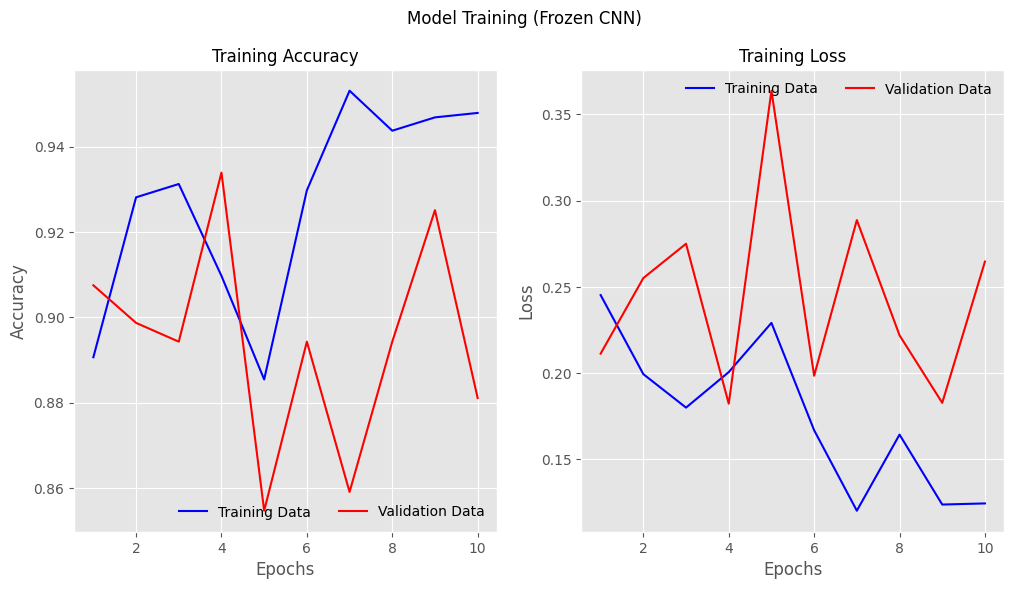

In [90]:
import matplotlib.pyplot as plt

# Ensure you use the same history variable
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)

# Get the number of epochs
max_epoch = len(history_03.history['accuracy']) + 1  # Make sure history_02 exists
epochs_list = list(range(1, max_epoch))

# Plot Accuracy
ax1.plot(epochs_list, history_03.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_03.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower right', ncol=2)  # Changed location to improve readability

# Plot Loss
ax2.plot(epochs_list, history_03.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_03.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper right', ncol=2)  # Adjusted position

# Save the plot
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')
plt.show()  # Display the plot



In [91]:
model_03.save('model2.h5')

In [92]:
model2=tf.keras.models.load_model('model2.h5')

In [93]:
vgg_val_eval_03 = model2.evaluate(valid_generator)
vgg_test_eval_03= model2.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.8771 - loss: 0.2590
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.8752 - loss: 0.4487


# 3rd model Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


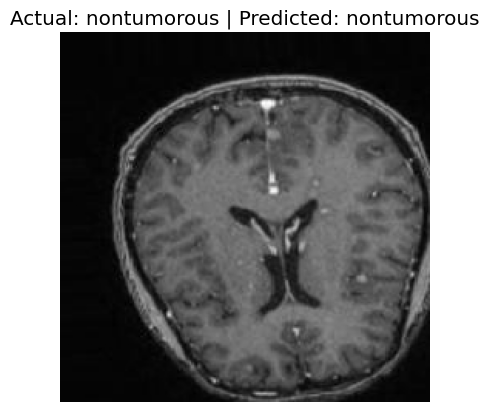

In [117]:
import matplotlib.pyplot as plt
import numpy as np

img, label = next(test_generator)

first_img = img[0]  # Remove .astype('uint8') if values are in [0, 1]
first_label = np.argmax(label[0])

pred_img = model2.predict(img)

plt.imshow(first_img)  # If needed: plt.imshow((first_img * 255).astype('uint8'))
plt.title(f"Actual: {class_name[first_label]} | Predicted: {class_name[np.argmax(pred_img[0])]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


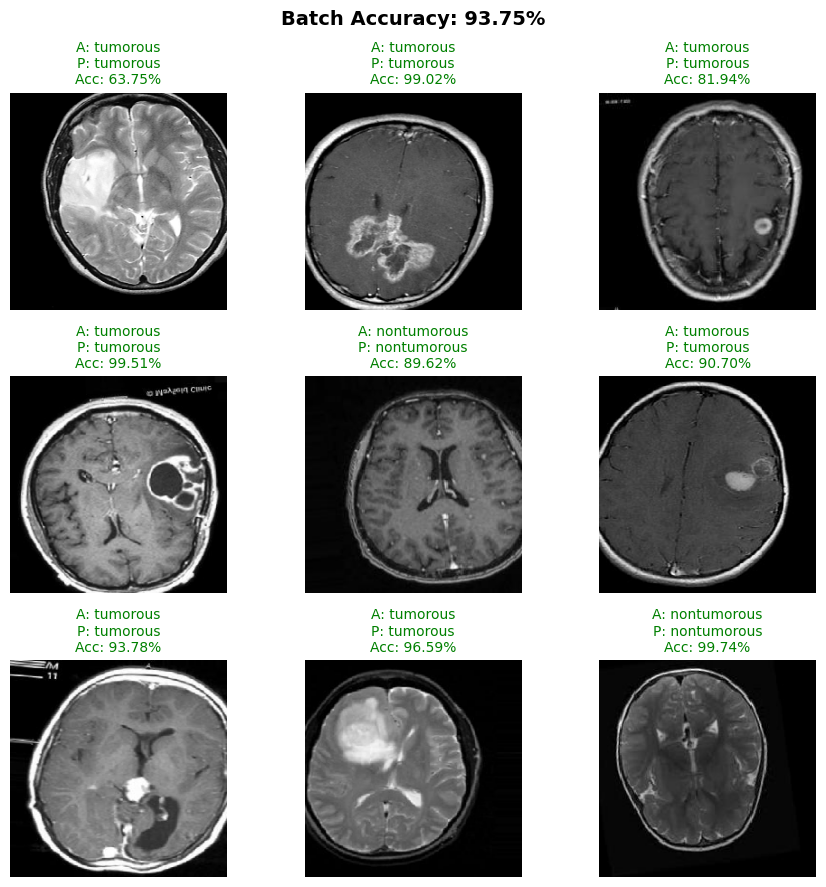

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
img, label = next(test_generator)

# Model predictions
pred_img = model2.predict(img)
pred_labels = np.argmax(pred_img, axis=1)
true_labels = np.argmax(label, axis=1)
confidences = np.max(pred_img, axis=1)  # Extract highest confidence score per prediction

# Calculate batch accuracy
batch_accuracy = np.mean(pred_labels == true_labels) * 100

# Display 3x3 grid of images
plt.figure(figsize=(9, 9))  # Adjust figure size for clarity

for i in range(9):
    plt.subplot(3, 3, i + 1)

    # Display image (ensure correct scaling)
    first_img = img[i]
    if first_img.max() <= 1:
        first_img = (first_img * 255).astype('uint8')

    plt.imshow(first_img)
    plt.axis('off')

    # Labels and accuracy display
    actual = class_name[true_labels[i]]
    predicted = class_name[pred_labels[i]]
    accuracy_score = confidences[i] * 100  # Confidence as percentage
    color = 'green' if actual == predicted else 'red'  # Highlight incorrect predictions

    plt.title(
        f"A: {actual}\nP: {predicted}\nAcc: {accuracy_score:.2f}%",
        fontsize=10,
        color=color
    )

# Add batch accuracy on top of the grid
plt.suptitle(f"Batch Accuracy: {batch_accuracy:.2f}%", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
